In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

# Vertex Count

    In this script, I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 1 mT with a rate of 0.0008 mT/s (1200 s). Then, we are analyzing the output data of Script-4.0.
    
    I will also analyze the particles' histogram, to check if particles are located on the hill.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-4.1"

In [3]:
slope = 50/1200
slope

0.041666666666666664

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_50mT-1200s_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_50mT-1200s_lowhill_l10_exp5.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp9.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp4.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp1.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp2.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp6.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp7.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp8.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp0.dat
ACI_CairoLattice_50mT-1200s_lowhill_l10_exp3.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge            dx  \
Exp frame  id                                                                 
0   0      24    386.412994 -319.766780             3      -1  1.732051e+00   
           32    729.269461 -718.098022             3       1  1.000000e+00   
           53    508.462454 -165.740997             3      -1 -1.000000e+00   
           54    524.422256 -193.338965             4       0  7.320502e-01   
           55    414.008086 -138.115369             4       2 -1.000000e+00   
...                     ...         ...           ...     ...           ...   
9   120000 1199  165.604996  -98.823647             3      -1 -1.732051e+00   
           1200  165.604996 -122.151465             3       1  1.732051e+00   
           1201  193.200984 -138.115544             4       2 -1.000000e+00   
           1206  232.453581 -110.471001             3       3 -3.747952e-07   
           1207  220.807007 -154.070450             3      -1 -1.732051e+00   

                       dy  
Exp frame  id              
0   0      24   -1.000000  
           32   -1.732051  
           53    1.732051  
           54    2.732051  
           55   -1.732051  
...                   ...  
9   120000 1199 -1.000000  
           1200 -1.000000  
           1201 -1.732051  
           1206  0.000000  
           1207 -1.000000  

[590480 rows x 6 columns]

    We remove the first shells of vertices

In [8]:
x_min = 95
y_min = -75

width = 700
hight = -700

x_max = x_min+width
y_max = y_min+hight

print(x_min,x_max,y_min,y_max)

95 795 -75 -775


In [9]:
Ca = Cairo_exp.loc[(Cairo_exp['x']<x_max) & (Cairo_exp['x']>x_min)]
Cairo_exp = Ca.loc[(Ca['y']>y_max) & (Ca['y']<y_min)]

In [10]:
Cairo_exp["type"] = np.NaN

# 4-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==-4, "type"] = "Q = -4"
Cairo_exp.loc[Cairo_exp.charge==-2, "type"] = "Q = -2"
Cairo_exp.loc[Cairo_exp.charge==+2, "type"] = "Q = +2"
Cairo_exp.loc[Cairo_exp.charge==+4, "type"] = "Q = +4"

zeroq = Cairo_exp.charge==0

dipole_magnitude = np.sqrt(Cairo_exp[zeroq].dx**2+Cairo_exp[zeroq].dy**2)

Cairo_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Cairo_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==+1, "type"] = "Q = +1"
Cairo_exp.loc[Cairo_exp.charge==-1, "type"] = "Q = -1"
Cairo_exp.loc[Cairo_exp.charge==+3, "type"] = "Q = +3"
Cairo_exp.loc[Cairo_exp.charge==-3, "type"] = "Q = -3"

In [11]:
Cairo_exp['field'] = (Cairo_exp.index.get_level_values('frame'))/100*slope

In [12]:
Cairo_exp

x           y  coordination  charge            dx  \
Exp frame  id                                                                 
0   0      24    386.412994 -319.766780             3      -1  1.732051e+00   
           32    729.269461 -718.098022             3       1  1.000000e+00   
           53    508.462454 -165.740997             3      -1 -1.000000e+00   
           54    524.422256 -193.338965             4       0  7.320502e-01   
           55    414.008086 -138.115369             4       2 -1.000000e+00   
...                     ...         ...           ...     ...           ...   
9   120000 1199  165.604996  -98.823647             3      -1 -1.732051e+00   
           1200  165.604996 -122.151465             3       1  1.732051e+00   
           1201  193.200984 -138.115544             4       2 -1.000000e+00   
           1206  232.453581 -110.471001             3       3 -3.747952e-07   
           1207  220.807007 -154.070450             3      -1 -1.732051e+00   

                       dy    type  field  
Exp frame  id                             
0   0      24   -1.000000  Q = -1    0.0  
           32   -1.732051  Q = +1    0.0  
           53    1.732051  Q = -1    0.0  
           54    2.732051   Q = 0    0.0  
           55   -1.732051  Q = +2    0.0  
...                   ...     ...    ...  
9   120000 1199 -1.000000  Q = -1   50.0  
           1200 -1.000000  Q = +1   50.0  
           1201 -1.732051  Q = +2   50.0  
           1206  0.000000  Q = +3   50.0  
           1207 -1.000000  Q = -1   50.0  

[590480 rows x 8 columns]

In [13]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Q = -4", "Q = -2", "Q = 0", "Q = +2", "Q = +4","Q = +1","Q = -1","Q = +3","Q = -3" ]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

Cairo_exp["mean"]= 0

In [14]:
count_m = Cairo_exp.loc[:,["type","field","coordination"]].groupby(["Exp","field","coordination"]).apply(count_types)
increase = (count_m/Cairo_exp.groupby(["Exp","field","coordination"]).count()).filter(["mean"])

In [15]:
a = increase.query('mean != 0')

In [16]:
a = a.reset_index()
del a['coordination']
a = a.set_index(['Exp', 'field','type'])
a

mean
Exp field type            
0   0.0   Q = +1  0.337349
          Q = +3  0.114458
          Q = -1  0.451807
          Q = -3  0.096386
          Q = +2  0.243590
...                    ...
9   50.0  Q = +2  0.269231
          Q = +4  0.057692
          Q = -2  0.179487
          Q = -4  0.032051
          Q = 0   0.461538

[10886 rows x 1 columns]

In [18]:
def evenly_spaced(series,space):
    series_w_space = pd.concat([
        series.droplevel([0,2]),series.droplevel([0,2]).reindex(space)]
    ).groupby(series.droplevel([0,2]).index.name).first().sort_index()
    
    series_w_space = series_w_space.interpolate(method="index")
    return series_w_space.loc[space]

In [19]:
field = np.linspace(0,50,75)


vert_prop_evenspace_m = a.groupby(["Exp","type"]).apply(evenly_spaced,field)

In [20]:
v_counts_m = vert_prop_evenspace_m.groupby(["field","type"]).mean()
v_counts_m["err"] = vert_prop_evenspace_m.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_m.groupby(["field","type"]).count().values)

In [21]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red"]) 

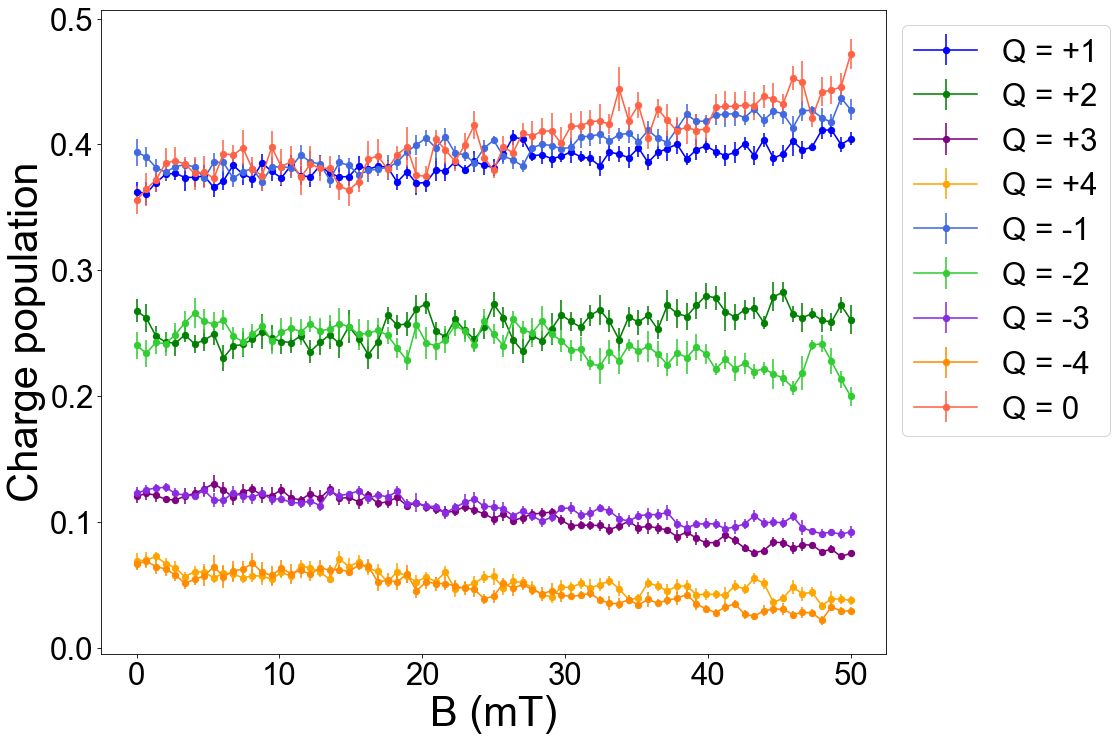

In [22]:
fig, ax1 = plt.subplots(figsize=(15,10))

for typ_m, mtype in v_counts_m.groupby('type'):
    
    plt.errorbar(mtype.index.get_level_values("field"), mtype["mean"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 30, bbox_to_anchor=(1, 1))
ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

plt.tight_layout()

## Particles' histogram

    It seems that we obtain a low quantity of flips whit this simulation parameters.
    I will observe also the particles position within the trap.

In [80]:
load_obj = mgc.trj_lazyread(os.path.join(data_directory,
                                             "ACI_CairoLattice_50mT-1200s_l10_exp0.lammpstrj"),
                                                output = ["x","y","z","mux","muy","muz"])   

bnd = load_obj.get_bounds()
trj = load_obj.read_trj()
col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])

In [81]:
col_trj

type            x            y    z       dx       dy   dz  \
frame  id                                                                 
0      0        2     0.000000     0.000000  0.0  4.52580  0.00000  0.0   
       1        2     0.000000    55.235699  0.0  0.00000  4.52580  0.0   
       2        2    55.201801   -55.269600  0.0 -4.52580 -0.00000 -0.0   
       3        2    55.201801    -0.033885  0.0 -0.00000 -4.52580 -0.0   
       4        2   110.403999     0.000000  0.0 -4.52580 -0.00000 -0.0   
...           ...          ...          ...  ...      ...      ...  ...   
120000 1995     3  1067.959961 -1036.560059  0.0  5.00000  8.66025  0.0   
       1996     3  1067.959961 -1062.459961  0.0  5.00000 -8.66025  0.0   
       1997     3  1091.119995 -1030.390015  0.0  8.66025 -5.00000  0.0   
       1998     3  1084.910034 -1007.190002  0.0  5.00000  8.66025  0.0   
       1999     3  1061.780029  -975.155029  0.0  8.66025  5.00000  0.0   

                   cx        cy   cz  
frame  id                             
0      0     2.262900  0.000000  0.0  
       1     0.000000  2.262901  0.0  
       2    -2.262901  0.000000  0.0  
       3     0.000000 -2.262905  0.0  
       4    -2.263000  0.000000  0.0  
...               ...       ...  ...  
120000 1995  1.940063  3.400024  0.0  
       1996  1.369995 -2.410034  0.0  
       1997  2.940063 -1.799927  0.0  
       1998  2.270020  4.090027  0.0  
       1999  0.900024  0.477051  0.0  

[2402000 rows x 10 columns]

(-100, -300)

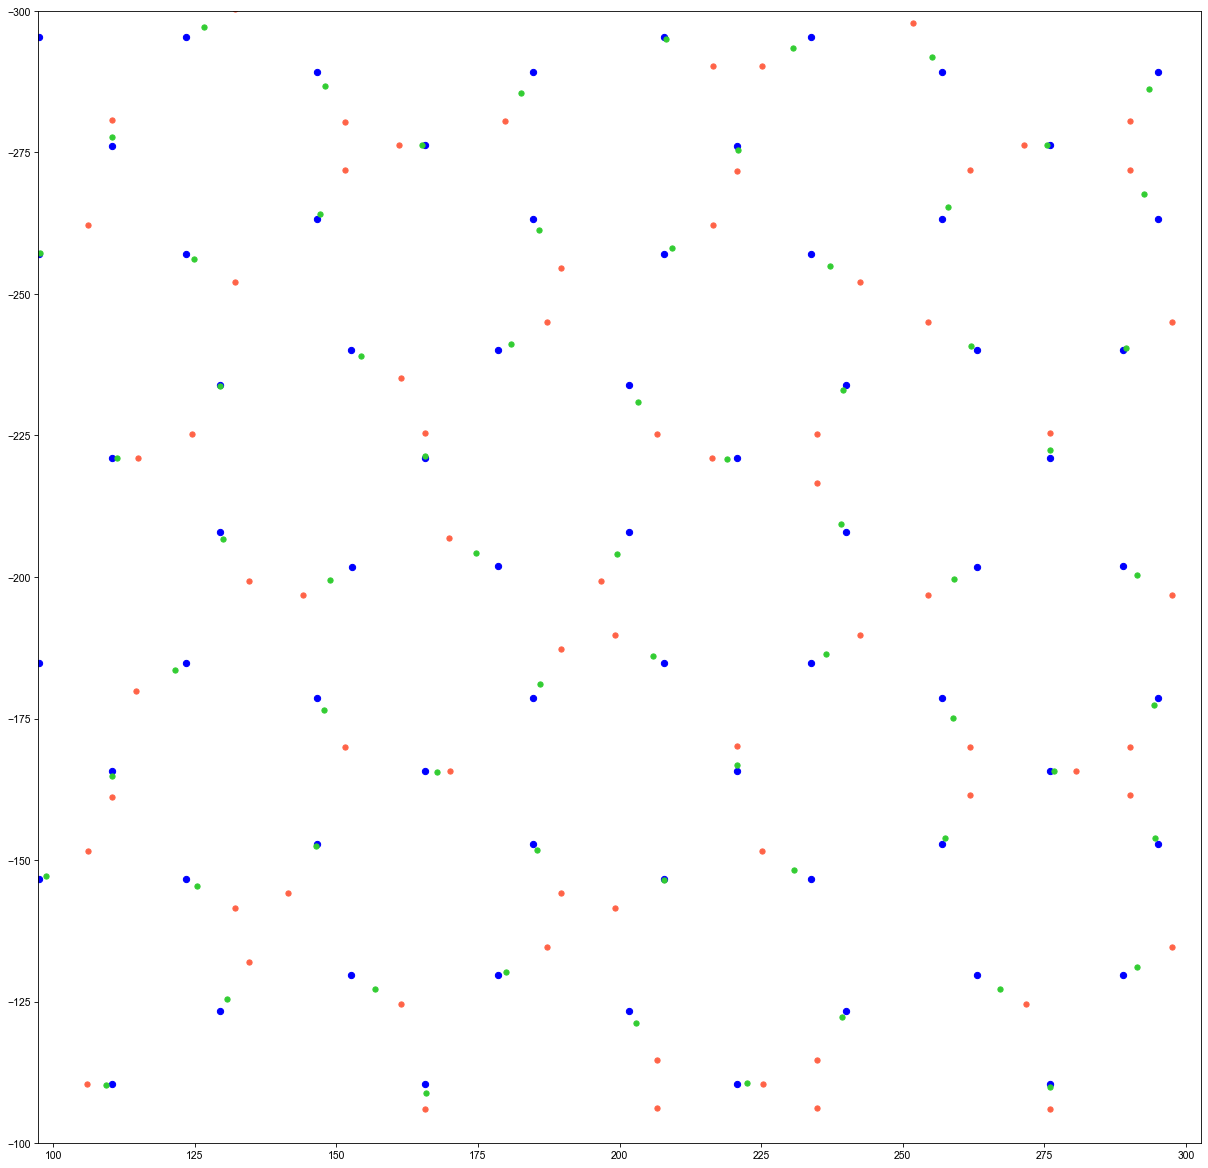

In [82]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 120000
# centers
plt.plot(col_trj.loc[frame].x,col_trj.loc[frame].y,'o', color ="blue")
# colloid position
plt.plot(col_trj.loc[frame].x+col_trj.loc[frame].cx,
         col_trj.loc[frame].y+col_trj.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(col_trj.loc[frame].x+col_trj.loc[frame].dx,
         col_trj.loc[frame].y+col_trj.loc[frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [83]:
type2 = col_trj.query('type == 2')
type3 = col_trj.query('type == 3')

(-100, -300)

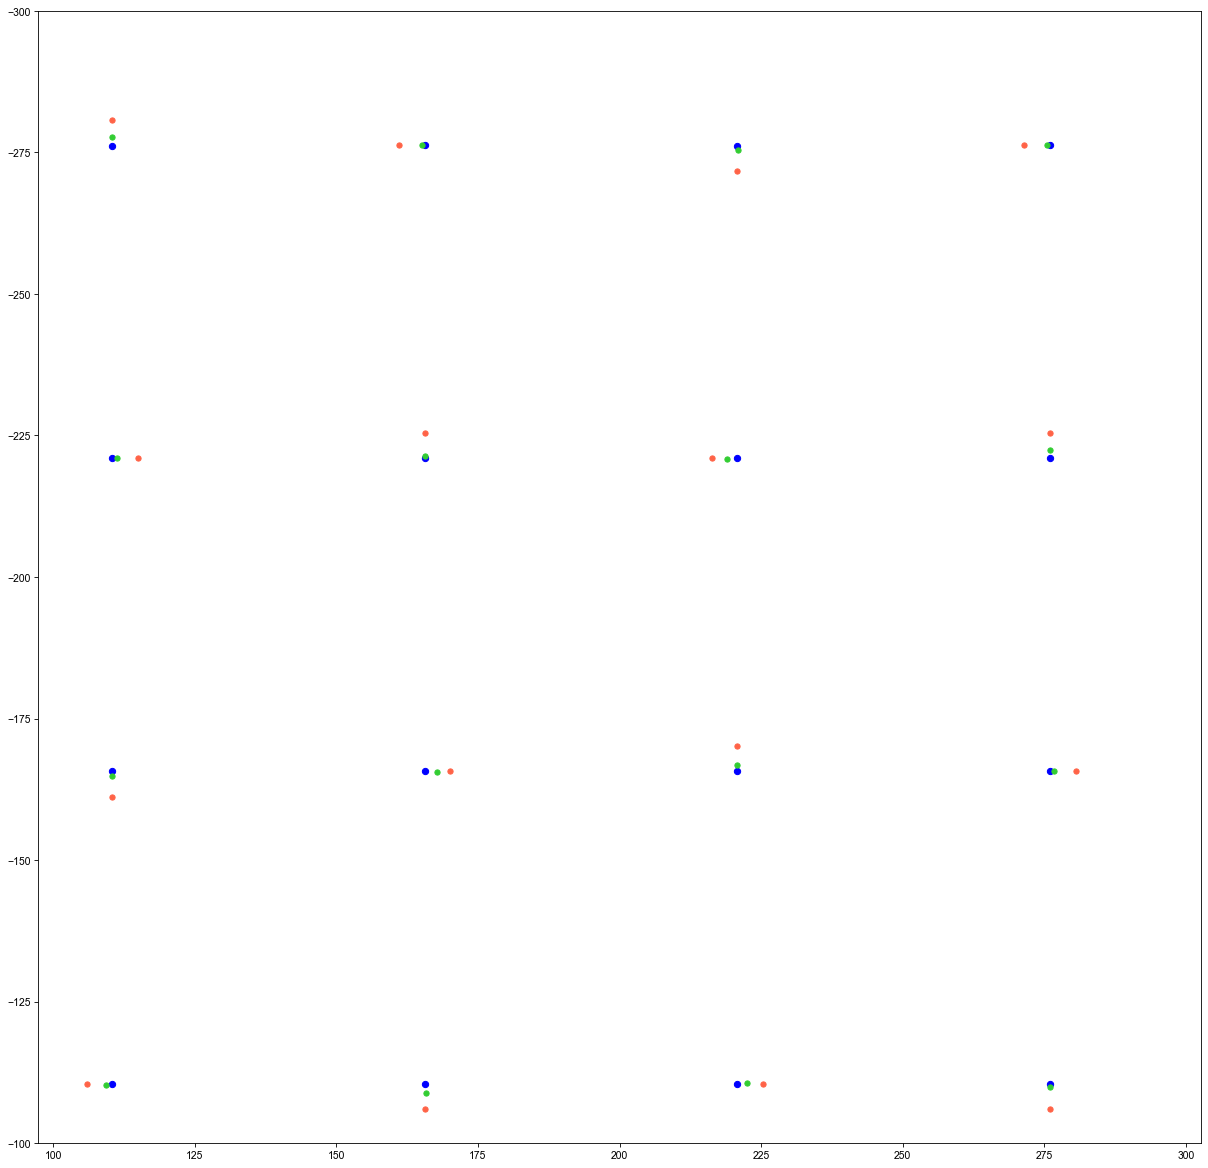

In [84]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 120000
# centers
plt.plot(type2.loc[frame].x,type2.loc[frame].y,'o', color ="blue")
# colloid position
plt.plot(type2.loc[frame].x+type2.loc[frame].cx,
         type2.loc[frame].y+type2.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type2.loc[frame].x+type2.loc[frame].dx,
        type2.loc[frame].y+type2.loc[frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [85]:
type2_v = type2.query('dy == 0 or dy == -0')
type2_h = type2.query('dx == 0 or dx == -0')

In [86]:
type2_v

type            x            y    z      dx   dy   dz        cx  \
frame  id                                                                     
0      0       2     0.000000     0.000000  0.0  4.5258  0.0  0.0  2.262900   
       2       2    55.201801   -55.269600  0.0 -4.5258 -0.0 -0.0 -2.262901   
       4       2   110.403999     0.000000  0.0 -4.5258 -0.0 -0.0 -2.263000   
       6       2   165.604996   -55.269600  0.0  4.5258  0.0  0.0  2.263000   
       8       2   220.807007     0.000000  0.0 -4.5258 -0.0 -0.0 -2.263000   
...          ...          ...          ...  ...     ...  ...  ...       ...   
120000 390     2   828.026978 -1049.510010  0.0 -4.5258 -0.0 -0.0 -0.026978   
       392     2   883.229004  -994.242004  0.0  4.5258  0.0  0.0  2.150024   
       394     2   938.431030 -1049.510010  0.0  4.5258  0.0  0.0  1.858948   
       396     2   993.632019  -994.242004  0.0  4.5258  0.0  0.0  0.765991   
       398     2  1048.829956 -1049.510010  0.0  4.5258  0.0  0.0  0.070068   

                  cy   cz  
frame  id                  
0      0    0.000000  0.0  
       2    0.000000  0.0  
       4    0.000000  0.0  
       6    0.000000  0.0  
       8    0.000000  0.0  
...              ...  ...  
120000 390 -0.059937  0.0  
       392 -0.205017  0.0  
       394  0.119995  0.0  
       396 -0.016968  0.0  
       398  0.030029  0.0  

[240224 rows x 10 columns]

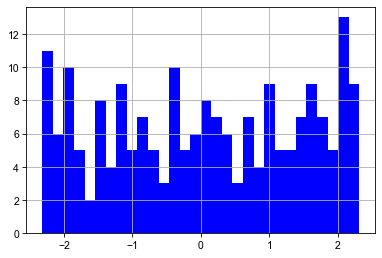

In [87]:
type2_v.loc[120000]['cx'].hist(bins = 30)

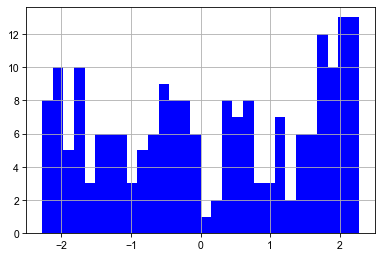

In [88]:
type2_h.loc[frame]['cy'].hist(bins = 30)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8920c08f50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8920c08f50>)

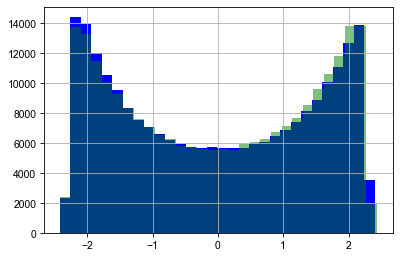

In [89]:
type2_v['cx'].hist(bins = 30), type2_h['cy'].hist(bins = 30, alpha = 0.5)

(-100, -300)

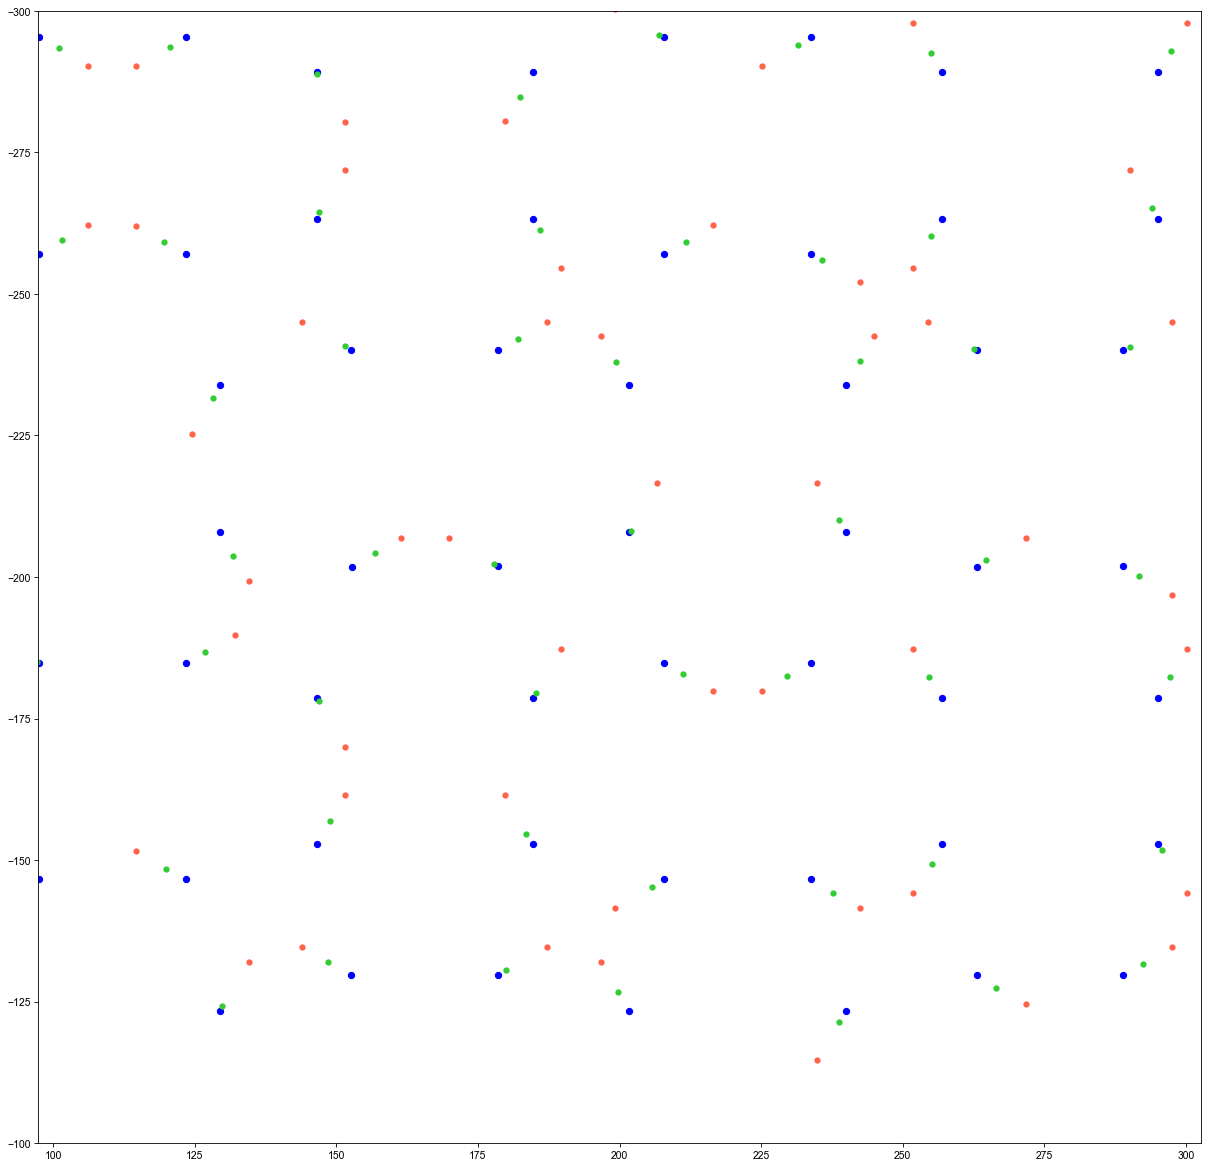

In [90]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 12000
# centers
plt.plot(type3.loc[frame].x,type3.loc[frame].y,'o', color ="blue")
# colloid position
plt.plot(type3.loc[frame].x+type3.loc[frame].cx,
         type3.loc[frame].y+type3.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3.loc[frame].x+type3.loc[frame].dx,
         type3.loc[frame].y+type3.loc[frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

    Actually, in the cx column I have the projection of the particle position on the trap in the x and y axis, instead of having the relative position inside the trap.
   
    Then, to obtain the histogram of particles I need to undo this projection. To have the distance of the particles from the trap center.

In [91]:
type3

type            x            y    z       dx       dy   dz  \
frame  id                                                                 
0      400      3   -19.121500    12.948000  0.0  5.00000 -8.66025 -0.0   
       401      3   -12.948000    36.114201  0.0  8.66025  5.00000  0.0   
       402      3    12.948000    36.114201  0.0  8.66025 -5.00000 -0.0   
       403      3    19.121500    12.948000  0.0 -5.00000 -8.66025 -0.0   
       404      3    19.121500   -12.948000  0.0  5.00000 -8.66025  0.0   
...           ...          ...          ...  ...      ...      ...  ...   
120000 1995     3  1067.959961 -1036.560059  0.0  5.00000  8.66025  0.0   
       1996     3  1067.959961 -1062.459961  0.0  5.00000 -8.66025  0.0   
       1997     3  1091.119995 -1030.390015  0.0  8.66025 -5.00000  0.0   
       1998     3  1084.910034 -1007.190002  0.0  5.00000  8.66025  0.0   
       1999     3  1061.780029  -975.155029  0.0  8.66025  5.00000  0.0   

                   cx        cy   cz  
frame  id                             
0      400   2.500000 -4.330140  0.0  
       401   4.330140  2.500000  0.0  
       402   4.330099 -2.500000  0.0  
       403  -2.500000 -4.330140  0.0  
       404   2.500000 -4.330099  0.0  
...               ...       ...  ...  
120000 1995  1.940063  3.400024  0.0  
       1996  1.369995 -2.410034  0.0  
       1997  2.940063 -1.799927  0.0  
       1998  2.270020  4.090027  0.0  
       1999  0.900024  0.477051  0.0  

[1921600 rows x 10 columns]

In [92]:
type3_v = type3.query('dx == 5 or dx == -5')
type3_h = type3.query('dy == 5 or dy == -5')

(-100, -300)

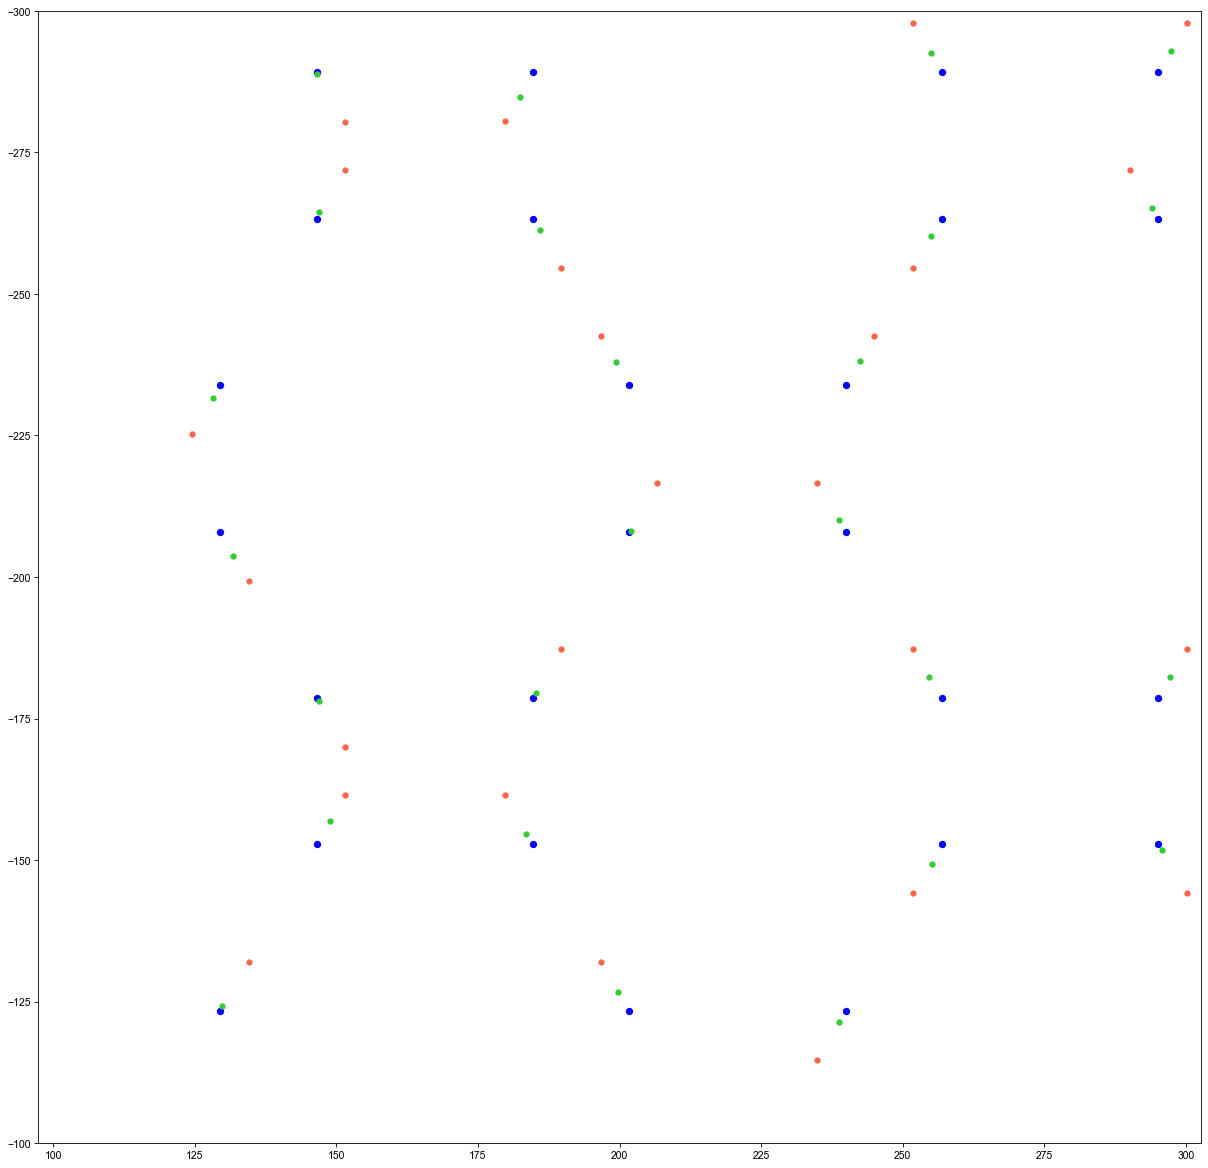

In [93]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 12000
# centers
plt.plot(type3_v.loc[frame].x,type3_v.loc[frame].y,'o', color ="blue")
# colloid position
plt.plot(type3_v.loc[frame].x+type3_v.loc[frame].cx,
         type3_v.loc[frame].y+type3_v.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3_v.loc[frame].x+type3_v.loc[frame].dx,
         type3_v.loc[frame].y+type3_v.loc[frame].dy, '.', markersize = 10, color ="tomato")

plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)


In [94]:
type3_v

type            x            y    z   dx       dy   dz        cx  \
frame  id                                                                       
0      400      3   -19.121500    12.948000  0.0  5.0 -8.66025 -0.0  2.500000   
       403      3    19.121500    12.948000  0.0 -5.0 -8.66025 -0.0 -2.500000   
       404      3    19.121500   -12.948000  0.0  5.0 -8.66025  0.0  2.500000   
       406      3    36.080299    42.321602  0.0 -5.0 -8.66025 -0.0 -2.500000   
       408      3    36.080299   -42.321602  0.0  5.0 -8.66025 -0.0  2.500000   
...           ...          ...          ...  ...  ...      ...  ...       ...   
120000 1990     3  1029.709961  -951.921021  0.0 -5.0 -8.66025 -0.0 -1.579956   
       1992     3  1029.709961 -1036.560059  0.0 -5.0  8.66025  0.0 -0.659912   
       1995     3  1067.959961 -1036.560059  0.0  5.0  8.66025  0.0  1.940063   
       1996     3  1067.959961 -1062.459961  0.0  5.0 -8.66025  0.0  1.369995   
       1998     3  1084.910034 -1007.190002  0.0  5.0  8.66025  0.0  2.270020   

                   cy   cz  
frame  id                   
0      400  -4.330140  0.0  
       403  -4.330140  0.0  
       404  -4.330099  0.0  
       406  -4.330101  0.0  
       408  -4.330097  0.0  
...               ...  ...  
120000 1990 -2.945007  0.0  
       1992  1.080078  0.0  
       1995  3.400024  0.0  
       1996 -2.410034  0.0  
       1998  4.090027  0.0  

[960800 rows x 10 columns]

In [95]:
type3_v['cy']= type3_v['cy']/np.cos(30*np.pi/180)

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
type3_v

type            x            y    z   dx       dy   dz        cx  \
frame  id                                                                       
0      400      3   -19.121500    12.948000  0.0  5.0 -8.66025 -0.0  2.500000   
       403      3    19.121500    12.948000  0.0 -5.0 -8.66025 -0.0 -2.500000   
       404      3    19.121500   -12.948000  0.0  5.0 -8.66025  0.0  2.500000   
       406      3    36.080299    42.321602  0.0 -5.0 -8.66025 -0.0 -2.500000   
       408      3    36.080299   -42.321602  0.0  5.0 -8.66025 -0.0  2.500000   
...           ...          ...          ...  ...  ...      ...  ...       ...   
120000 1990     3  1029.709961  -951.921021  0.0 -5.0 -8.66025 -0.0 -1.579956   
       1992     3  1029.709961 -1036.560059  0.0 -5.0  8.66025  0.0 -0.659912   
       1995     3  1067.959961 -1036.560059  0.0  5.0  8.66025  0.0  1.940063   
       1996     3  1067.959961 -1062.459961  0.0  5.0 -8.66025  0.0  1.369995   
       1998     3  1084.910034 -1007.190002  0.0  5.0  8.66025  0.0  2.270020   

                   cy   cz  
frame  id                   
0      400  -5.000015  0.0  
       403  -5.000015  0.0  
       404  -4.999968  0.0  
       406  -4.999970  0.0  
       408  -4.999966  0.0  
...               ...  ...  
120000 1990 -3.400602  0.0  
       1992  1.247167  0.0  
       1995  3.926010  0.0  
       1996 -2.782868  0.0  
       1998  4.722756  0.0  

[960800 rows x 10 columns]

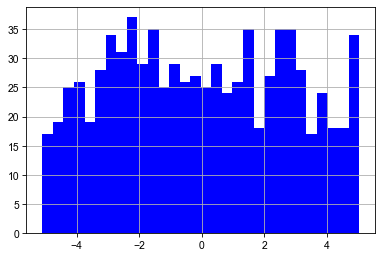

In [97]:
type3_v.loc[120000]['cy'].hist(bins = 30)

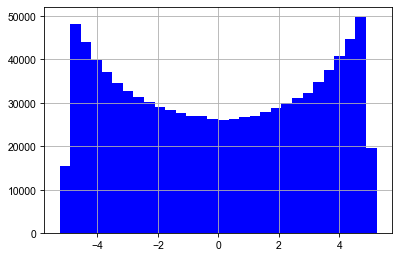

In [98]:
type3_v['cy'].hist(bins = 30)

(-100, -300)

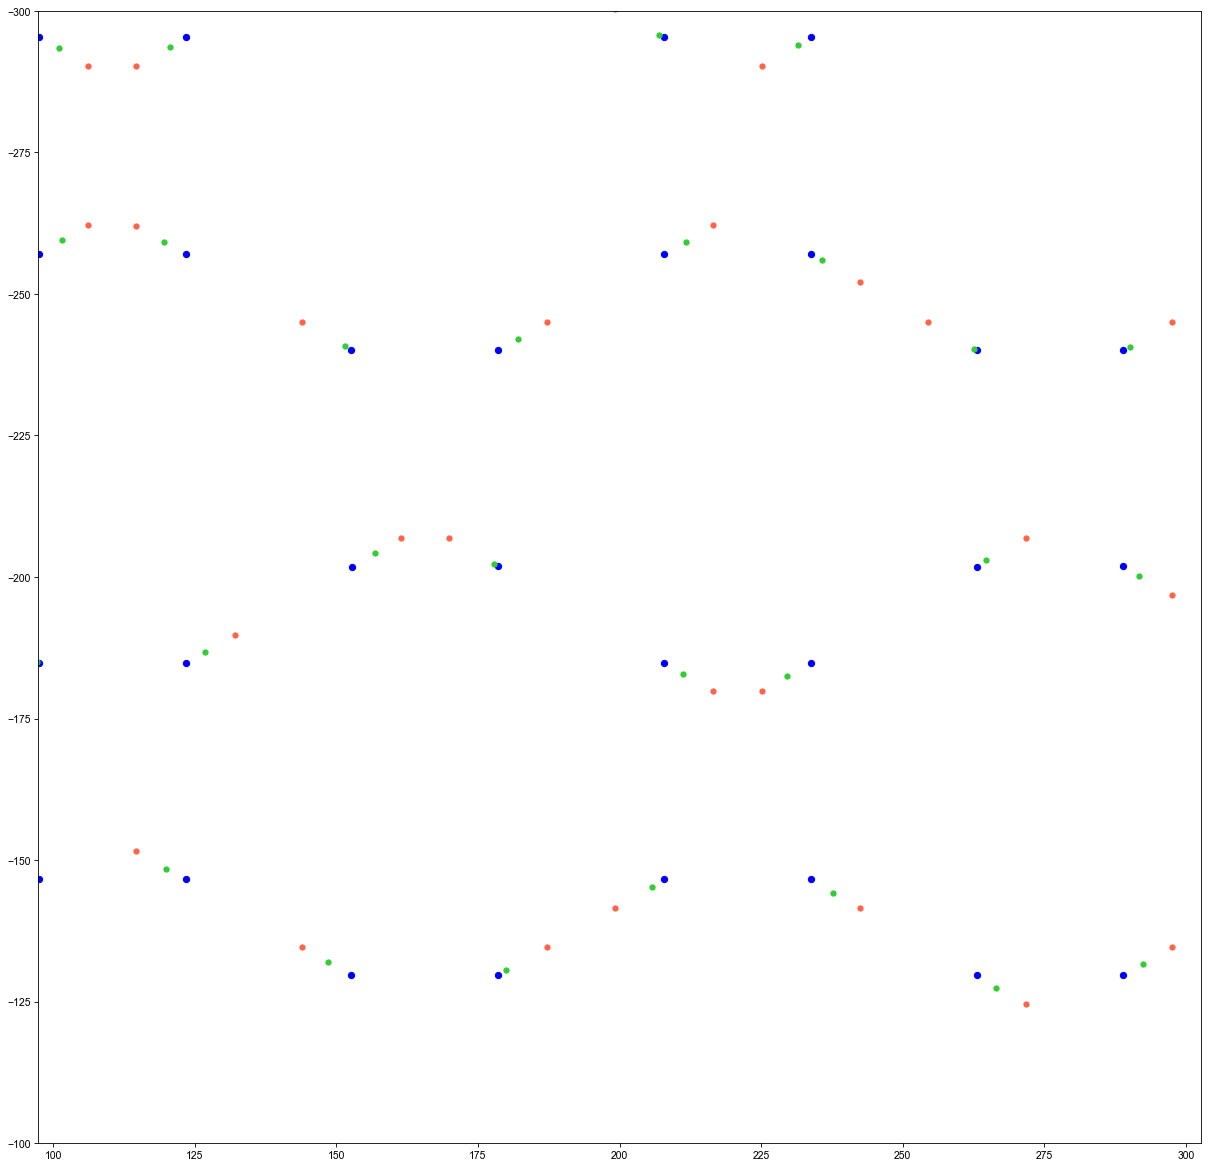

In [99]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 12000
# centers
plt.plot(type3_h.loc[frame].x,type3_h.loc[frame].y,'o', color ="blue")
# colloid positon
plt.plot(type3_h.loc[frame].x+type3_h.loc[frame].cx,
         type3_h.loc[frame].y+type3_h.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3_h.loc[frame].x+type3_h.loc[frame].dx,
         type3_h.loc[frame].y+type3_h.loc[frame].dy, '.', markersize = 10, color ="tomato")

plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [100]:
type3_h

type            x            y    z       dx   dy   dz        cx  \
frame  id                                                                       
0      401      3   -12.948000    36.114201  0.0  8.66025  5.0  0.0  4.330140   
       402      3    12.948000    36.114201  0.0  8.66025 -5.0 -0.0  4.330099   
       405      3    42.287701    19.121500  0.0 -8.66025  5.0 -0.0 -4.330101   
       407      3    12.948000    74.357201  0.0 -8.66025 -5.0 -0.0 -4.330140   
       409      3    42.253799   -19.155399  0.0  8.66025  5.0  0.0  4.330101   
...           ...          ...          ...  ...      ...  ...  ...       ...   
120000 1991     3  1006.580017  -919.885010  0.0  8.66025  5.0  0.0  0.219971   
       1993     3  1035.890015 -1013.400024  0.0  8.66025  5.0  0.0  2.689941   
       1994     3  1061.780029 -1013.400024  0.0  8.66025 -5.0 -0.0  3.589966   
       1997     3  1091.119995 -1030.390015  0.0  8.66025 -5.0  0.0  2.940063   
       1999     3  1061.780029  -975.155029  0.0  8.66025  5.0  0.0  0.900024   

                   cy   cz  
frame  id                   
0      401   2.500000  0.0  
       402  -2.500000  0.0  
       405   2.500000  0.0  
       407  -2.500000  0.0  
       409   2.500000  0.0  
...               ...  ...  
120000 1991  0.174988  0.0  
       1993  1.730042  0.0  
       1994 -2.029968  0.0  
       1997 -1.799927  0.0  
       1999  0.477051  0.0  

[960799 rows x 10 columns]

In [101]:
type3_h['cx'] = type3_h['cx']/np.cos(30*np.pi/180)

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
type3_h

type            x            y    z       dx   dy   dz        cx  \
frame  id                                                                       
0      401      3   -12.948000    36.114201  0.0  8.66025  5.0  0.0  5.000015   
       402      3    12.948000    36.114201  0.0  8.66025 -5.0 -0.0  4.999968   
       405      3    42.287701    19.121500  0.0 -8.66025  5.0 -0.0 -4.999970   
       407      3    12.948000    74.357201  0.0 -8.66025 -5.0 -0.0 -5.000015   
       409      3    42.253799   -19.155399  0.0  8.66025  5.0  0.0  4.999970   
...           ...          ...          ...  ...      ...  ...  ...       ...   
120000 1991     3  1006.580017  -919.885010  0.0  8.66025  5.0  0.0  0.254000   
       1993     3  1035.890015 -1013.400024  0.0  8.66025  5.0  0.0  3.106077   
       1994     3  1061.780029 -1013.400024  0.0  8.66025 -5.0 -0.0  4.145335   
       1997     3  1091.119995 -1030.390015  0.0  8.66025 -5.0  0.0  3.394893   
       1999     3  1061.780029  -975.155029  0.0  8.66025  5.0  0.0  1.039259   

                   cy   cz  
frame  id                   
0      401   2.500000  0.0  
       402  -2.500000  0.0  
       405   2.500000  0.0  
       407  -2.500000  0.0  
       409   2.500000  0.0  
...               ...  ...  
120000 1991  0.174988  0.0  
       1993  1.730042  0.0  
       1994 -2.029968  0.0  
       1997 -1.799927  0.0  
       1999  0.477051  0.0  

[960799 rows x 10 columns]

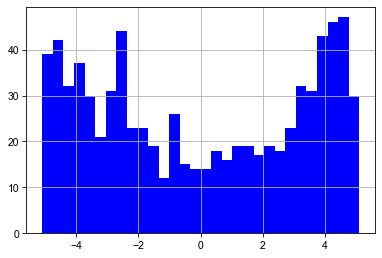

In [103]:
type3_h.loc[12000]['cx'].hist(bins = 30)

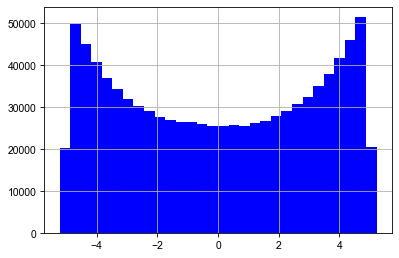

In [104]:
type3_h['cx'].hist(bins = 30)